Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [34]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-15 03:11:10--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-15 03:11:10--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv.1’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-15 03:11:10 (47.0 MB/s) -

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

**CustomerID: Es un identificador exclusivo asignado a cada cliente. Aunque permite reconocer a cada individuo, no resulta relevante para fines de segmentación.**

**Gender: Indica el sexo del cliente. Esta variable puede aportar información valiosa durante el análisis.**

**Age: Corresponde a la edad del cliente en años y tiene un impacto significativo en sus hábitos de consumo.**

**Annual Income (k$): Muestra el ingreso anual del cliente expresado en miles de dólares. Esta variable es fundamental para evaluar su poder adquisitivo.**

**Spending Score (1–100): Es un indicador del comportamiento de gasto, donde los valores más altos reflejan un mayor nivel de consumo. Es una métrica clave para detectar patrones de compra.**

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [39]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [40]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']]

In [41]:
x = x.dropna()

In [42]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.

**La normalización de los datos es un paso crucial antes de aplicar el algoritmo K-means, ya que este es sensible a las diferencias de escala entre variables. Cuando las variables tienen unidades distintas o rangos muy dispares, aquellas con valores más grandes pueden influir desproporcionadamente en el resultado. Al normalizar, se ajustan los datos para que tengan una media de 0 y una desviación estándar de 1, lo que garantiza que cada variable tenga un peso equitativo en la creación de los clusters. Esto contribuye a obtener agrupaciones más precisas y representativas**



Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


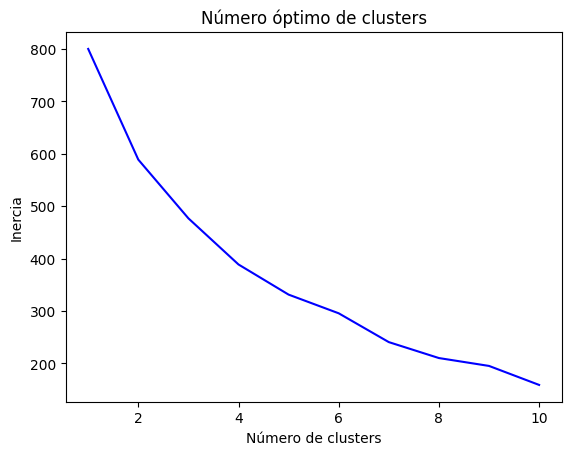

In [44]:
inertia = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia,color="blue")
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Número óptimo de clusters')
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

**Al analizar la gráfica del método del codo, se observa que la curva comienza a estabilizarse alrededor del punto correspondiente a 5 clusters. Esto sugiere que cinco es una cantidad adecuada de grupos para este análisis, ya que a partir de ese valor la reducción de la inercia es mínima y añadir más clusters no aporta mejoras significativas al resultado del agrupamiento.**

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [45]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(x_scaled)

In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,2
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [47]:
data['Cluster'].value_counts()

,count
Cluster,
1,57
2,55
4,41
0,28
3,19


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

**Los resultados muestran que los 200 clientes han sido agrupados en cinco segmentos diferentes, identificados con las etiquetas del 0 al 4. La distribución entre los grupos no es equitativa, lo que indica que algunos clusters concentran una mayor cantidad de clientes. Por ejemplo, los grupos 1 y 2 presentan la mayor proporción de clientes, mientras que el grupo 3 es el menos numeroso. Esta variación refleja que ciertos perfiles de clientes son más frecuentes que otros.**

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [48]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        57.214286           46.785714               38.714286
1        28.438596           59.666667               67.684211
2        48.109091           58.818182               34.781818
3        38.473684           85.894737               14.210526
4        28.536585           61.804878               71.097561


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?

**Los resultados revelan diferencias marcadas entre los clusters en cuanto a edad, nivel de ingresos y comportamiento de gasto. El cluster 0 reúne a personas de mayor edad con ingresos moderados y un gasto relativamente bajo. El cluster 1 agrupa a clientes jóvenes con ingresos medio-altos y un elevado nivel de gasto. Por su parte, el cluster 2 está formado por adultos con ingresos estables, pero con un bajo consumo. El cluster 3 incluye a clientes de mediana edad que, a pesar de tener altos ingresos, presentan un gasto muy reducido. Finalmente, el cluster 4 se caracteriza por jóvenes con ingresos elevados y un comportamiento de gasto muy alto. Esta segmentación permite distinguir distintos tipos de clientes y facilita el diseño de estrategias más adecuadas para cada perfil.**

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

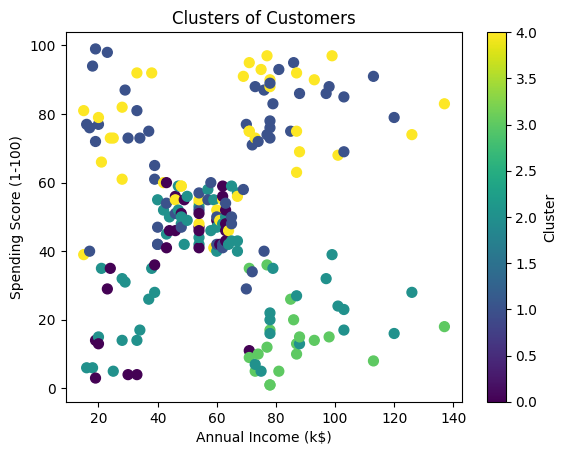

In [50]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.colorbar(label='Cluster')
plt.show()

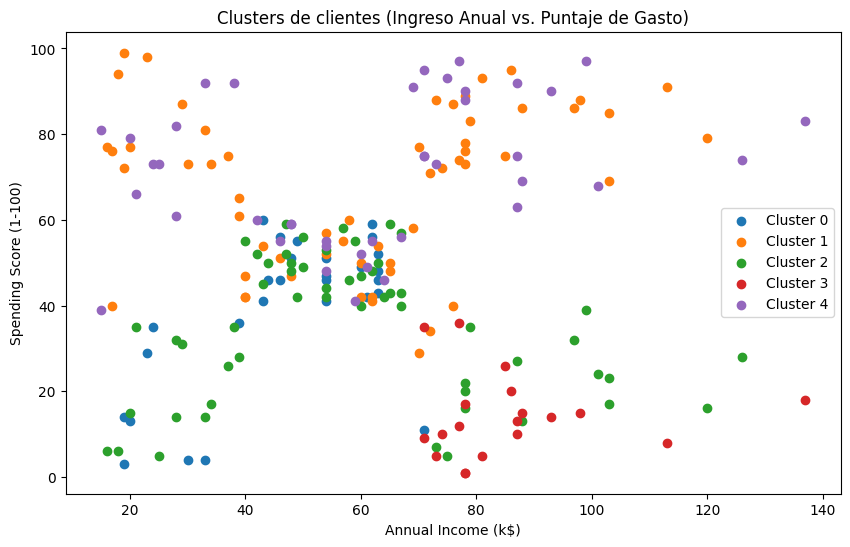

In [51]:
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_clusters):
    subset = data[data['Cluster'] == cluster_num]
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], label=f'Cluster {cluster_num}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de clientes (Ingreso Anual vs. Puntaje de Gasto)')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

**la gráfica permite observar grupos claramente delimitados, donde los clientes se distribuyen de forma visible según su ingreso anual y su puntaje de gasto.**

* **Cluster 0 (color negro):** Agrupa a personas con ingresos bajos y bajo nivel de gasto, lo que refleja un poder adquisitivo limitado y un comportamiento de consumo reducido.
* **Cluster 1 (color rosa oscuro):** Incluye clientes con ingresos medios y altos niveles de gasto, caracterizados por ser consumidores activos con buena capacidad económica.
* **Cluster 2 (color morado oscuro):** Está compuesto por personas con ingresos medio-altos, pero con bajos puntajes de gasto, lo que indica una baja predisposición al consumo pese a su estabilidad financiera.
* **Cluster 3 (color naranja claro):** Corresponde a clientes con altos ingresos, pero que muestran un gasto muy bajo, lo cual los define como consumidores con alto poder adquisitivo pero poco participativos.
* **Cluster 4 (color amarillo claro):** Reúne a clientes con ingresos medios y un gasto muy elevado, lo que los convierte en compradores frecuentes y valiosos para el negocio.

**En conjunto, los clusters presentan una separación clara, lo que sugiere que el algoritmo K-means logró segmentar de forma efectiva a los clientes en función de sus hábitos de consumo.**



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

**Cluster 0: Adultos Prudentes**
**Justificación:** Este grupo está compuesto por personas mayores (edad promedio de 57 años), con ingresos medio-bajos (46 mil dólares) y un nivel de gasto moderado (puntaje de 38). Se trata de clientes con una actitud más reservada y cuidadosa al momento de comprar.

**Cluster 1: Jóvenes Dinámicos**
**Justificación:** Integrado por clientes jóvenes (28 años), con ingresos medios (59 mil dólares) y un alto puntaje de gasto (67). Este perfil sugiere consumidores activos, posiblemente impulsivos o con alta lealtad a determinadas marcas o productos.

**Cluster 2: Compradores Cautos**
**Justificación:** Personas de edad intermedia (48 años), con ingresos medio-altos (58 mil dólares) y un gasto contenido (puntaje de 35). Aunque tienen estabilidad financiera, su comportamiento de consumo es moderado.

**Cluster 3: Ahorradores de Alto Ingreso**
**Justificación:** Jóvenes (38 años) con elevados ingresos (85 mil dólares), pero con un puntaje de gasto muy bajo (14). A pesar de su poder adquisitivo, muestran una tendencia clara al ahorro o al consumo mínimo.

**Cluster 4: Jóvenes Exclusivos**
**Justificación:** Este grupo está conformado por jóvenes (28 años) con ingresos medio-altos (61 mil dólares) y un nivel de gasto muy elevado (71). Son consumidores que tienden a gastar más y podrían inclinarse por productos premium o de lujo.
